In [1]:
import pandas as pd
import numpy as np
import graphlab
content_df = pd.read_table('data/u.data', names = ['user_id', 'item_id', 'target','ts'])
del content_df['ts']

In [2]:
content = graphlab.SFrame(content_df)
model = graphlab.recommender.factorization_recommender.create(content, user_id='user_id', item_id='item_id', target='target', solver='als')

This non-commercial license of GraphLab Create for academic use is assigned to jerry3921366@gmail.com and will expire on December 07, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1512691956.log


Recsys training: model = factorization_recommender

Preparing data set.

Data has 100000 observations with 943 users and 1682 items.

Data prepared in: 0.198737s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 239us        | NA                     |

+---------+--------------+------------------------+

| 0       | 156.884ms    | 0.973698               |

| 1       | 244.888ms    | 0.819137               |

| 2       | 328.813ms    | 0.780806               |

| 3       | 417.753ms    | 0.765737               |

| 4       | 513.437ms    | 0.757564               |

| 5       | 609.125ms    | 0.752195               |

| 6       | 701.081ms    | 0.748245               |

| 7       | 798.581ms    | 0.745128               |

| 8       | 892.606ms    | 0.74253                |

| 9       | 986.617ms    | 0.740347               |

| 10      | 1.07s        | 0.738471               |

| 11      | 1.16s        | 0.736867               |

| 12      | 1.24s        | 0.735563               |

| 13      | 1.33s        | 0.734434               |

| 14      | 1.42s        | 0.733449               |

| 15      | 1.51s        | 0.732556               |

| 16      | 1.61s        | 0.731745               |

| 17      | 1.70s        | 0.730888               |

| 18      | 1.80s        | 0.730193               |

| 19      | 1.91s        | 0.729598               |

| 20      | 2.00s        | 0.729067               |

| 21      | 2.08s        | 0.728575               |

| 22      | 2.17s        | 0.728112               |

| 23      | 2.25s        | 0.727636               |

| 24      | 2.34s        | 0.72719                |

| 25      | 2.47s        | 0.726763               |

| 26      | 2.63s        | 0.726349               |

| 27      | 2.76s        | 0.72596                |

| 28      | 2.87s        | 0.725598               |

| 29      | 3.00s        | 0.725265               |

| 30      | 3.17s        | 0.724959               |

| 31      | 3.29s        | 0.724679               |

| 32      | 3.40s        | 0.724424               |

| 33      | 3.49s        | 0.72419                |

| 34      | 3.65s        | 0.723977               |

| 35      | 3.75s        | 0.723784               |

| 36      | 3.84s        | 0.72361                |

| 37      | 3.93s        | 0.723453               |

| 38      | 4.05s        | 0.723311               |

| 39      | 4.13s        | 0.72318                |

| 40      | 4.22s        | 0.723059               |

| 41      | 4.31s        | 0.722944               |

| 42      | 4.39s        | 0.722837               |

| 43      | 4.48s        | 0.722736               |

| 44      | 4.56s        | 0.72264                |

| 45      | 4.65s        | 0.722549               |

| 46      | 4.74s        | 0.722463               |

| 47      | 4.83s        | 0.722381               |

| 48      | 4.92s        | 0.722302               |

| 49      | 5.00s        | 0.722226               |

| FINAL   | 5.04s        | 0.722226               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [3]:
one_datapoint_sf = graphlab.SFrame({'user_id': [1], 'item_id': [100]})
model.predict(one_datapoint_sf)

dtype: float
Rows: 1
[4.819384555206293]

In [4]:
model.list_fields()

['adagrad_momentum_weighting',
 'additional_iterations_if_unhealthy',
 'binary_target',
 'coefficients',
 'data_load_time',
 'init_random_sigma',
 'item_id',
 'item_side_data_column_names',
 'item_side_data_column_types',
 'linear_regularization',
 'max_iterations',
 'model_name',
 'nmf',
 'num_factors',
 'num_features',
 'num_item_side_features',
 'num_items',
 'num_observations',
 'num_tempering_iterations',
 'num_user_side_features',
 'num_users',
 'observation_data_column_names',
 'random_seed',
 'regularization',
 'regularization_type',
 'sgd_convergence_interval',
 'sgd_convergence_threshold',
 'sgd_max_trial_iterations',
 'sgd_sampling_block_size',
 'sgd_step_adjustment_interval',
 'sgd_step_size',
 'sgd_trial_sample_minimum_size',
 'sgd_trial_sample_proportion',
 'side_data_factorization',
 'solver',
 'step_size_decrease_rate',
 'target',
 'tempering_regularization_start_value',
 'track_exact_loss',
 'training_rmse',
 'training_stats',
 'training_time',
 'user_id',
 'user_side_

In [5]:
itemdf = model.get('coefficients')['item_id']
userdf = model.get('coefficients')['user_id']
user1 = userdf[userdf['user_id'] ==1]['factors'].to_numpy()
item100 = itemdf[itemdf['item_id']==100]['factors'].to_numpy()
np.dot(user1,item100.T) + model.get('coefficients')['intercept']

array([[ 4.81938464]])

In [6]:
model['training_rmse']

0.7222256952780111

In [7]:
content_df['prediction'] = model.predict(graphlab.SFrame({'user_id':content_df['user_id'] , 'item_id': content_df['item_id']}))

In [12]:
sum((content_df['prediction'] - content_df['target']) ** 2 / len(content_df)) ** 0.5

0.72222569527801161

In [13]:
content_df['prediction'].describe()

count    100000.000000
mean          3.529778
std           0.863424
min          -0.337615
25%           3.027668
50%           3.641162
75%           4.131059
max           6.405602
Name: prediction, dtype: float64

In [14]:
content_df['target'].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: target, dtype: float64

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

,user_id,item_id,target,prediction
0,196,242,3,3.491706
1,186,302,3,2.600465
2,22,377,1,1.280030
3,244,51,2,3.605151
4,166,346,1,1.684860
5,298,474,4,3.967730
6,115,265,2,2.967663
7,253,465,5,4.075494
8,305,451,3,2.743032
9,6,86,3,3.789846


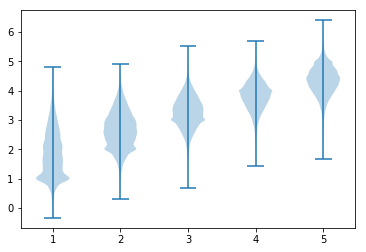

In [23]:
plt.violinplot([content_df[content_df['target'] == i]['prediction'] for i in range(1,6)], [1,2,3,4,5])
plt.show()

In [20]:
model0 = graphlab.recommender.factorization_recommender.create(content, user_id='user_id', item_id='item_id', target='target', solver='als', regularization=0)
modeln4 = graphlab.recommender.factorization_recommender.create(content, user_id='user_id', item_id='item_id', target='target', solver='als', regularization=1e-4)
print model0['training_rmse']
print modeln4['training_rmse']

Recsys training: model = factorization_recommender

Preparing data set.

Data has 100000 observations with 943 users and 1682 items.

Data prepared in: 0.15952s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 0        |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 122us        | NA                     |

+---------+--------------+------------------------+

| 0       | 126.637ms    | 0.967283               |

| 1       | 220.27ms     | 0.8434                 |

| 2       | 314.077ms    | 0.795585               |

| 3       | 403.924ms    | 0.774392               |

| 4       | 493.89ms     | 0.763091               |

| 5       | 584.524ms    | 0.756079               |

| 6       | 674.238ms    | 0.751473               |

| 7       | 772.284ms    | 0.748082               |

| 8       | 858.358ms    | 0.745439               |

| 9       | 950.909ms    | 0.743256               |

| 10      | 1.04s        | 0.741455               |

| 11      | 1.13s        | 0.739931               |

| 12      | 1.23s        | 0.738675               |

| 13      | 1.33s        | 0.737625               |

| 14      | 1.41s        | 0.736691               |

| 15      | 1.50s        | 0.735849               |

| 16      | 1.59s        | 0.735118               |

| 17      | 1.68s        | 0.734438               |

| 18      | 1.77s        | 0.733851               |

| 19      | 1.87s        | 0.733265               |

| 20      | 1.97s        | 0.732744               |

| 21      | 2.05s        | 0.732222               |

| 22      | 2.14s        | 0.731774               |

| 23      | 2.24s        | 0.73137                |

| 24      | 2.33s        | 0.730776               |

| 25      | 2.42s        | 0.730357               |

| 26      | 2.52s        | 0.729978               |

| 27      | 2.61s        | 0.729663               |

| 28      | 2.70s        | 0.729386               |

| 29      | 2.79s        | 0.729141               |

| 30      | 2.88s        | 0.728908               |

| 31      | 2.98s        | 0.728705               |

| 32      | 3.08s        | 0.728518               |

| 33      | 3.18s        | 0.728337               |

| 34      | 3.32s        | 0.728161               |

| 35      | 3.48s        | 0.727987               |

| 36      | 3.56s        | 0.727819               |

| 37      | 3.66s        | 0.727665               |

| 38      | 3.76s        | 0.727515               |

| 39      | 3.84s        | 0.727379               |

| 40      | 3.94s        | 0.727247               |

| 41      | 4.03s        | 0.727126               |

| 42      | 4.11s        | 0.727013               |

| 43      | 4.19s        | 0.726901               |

| 44      | 4.28s        | 0.726791               |

| 45      | 4.38s        | 0.726686               |

| 46      | 4.47s        | 0.726584               |

| 47      | 4.56s        | 0.726485               |

| 48      | 4.65s        | 0.726388               |

| 49      | 4.73s        | 0.726289               |

| FINAL   | 4.73s        | 0.726289               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 100000 observations with 943 users and 1682 items.

Data prepared in: 0.143212s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 0.0001   |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 76us         | NA                     |

+---------+--------------+------------------------+

| 0       | 127.358ms    | 1.12567                |

| 1       | 217.304ms    | 1.12021                |

| 2       | 303.096ms    | 0.915286               |

| 3       | 397.736ms    | 0.848034               |

| 4       | 491.133ms    | 0.824953               |

| 5       | 585.3ms      | 0.818236               |

| 6       | 691.106ms    | 0.815291               |

| 7       | 778.873ms    | 0.813714               |

| 8       | 872.658ms    | 0.812761               |

| 9       | 958.685ms    | 0.812138               |

| 10      | 1.04s        | 0.811707               |

| 11      | 1.15s        | 0.811393               |

| 12      | 1.26s        | 0.811157               |

| 13      | 1.36s        | 0.810973               |

| 14      | 1.47s        | 0.810826               |

| 15      | 1.60s        | 0.810707               |

| 16      | 1.74s        | 0.810609               |

| 17      | 1.86s        | 0.810527               |

| 18      | 1.97s        | 0.810458               |

| 19      | 2.06s        | 0.810399               |

| 20      | 2.16s        | 0.810347               |

| 21      | 2.24s        | 0.810303               |

| 22      | 2.34s        | 0.810263               |

| 23      | 2.44s        | 0.810228               |

| 24      | 2.54s        | 0.810195               |

| 25      | 2.63s        | 0.810166               |

| 26      | 2.72s        | 0.810138               |

| 27      | 2.81s        | 0.810112               |

| 28      | 2.91s        | 0.810088               |

| 29      | 3.00s        | 0.810066               |

| 30      | 3.09s        | 0.810045               |

| 31      | 3.18s        | 0.810025               |

| 32      | 3.26s        | 0.810006               |

| 33      | 3.35s        | 0.809988               |

| 34      | 3.45s        | 0.809972               |

| 35      | 3.55s        | 0.809957               |

| 36      | 3.64s        | 0.809943               |

| 37      | 3.72s        | 0.809931               |

| 38      | 3.81s        | 0.809919               |

| 39      | 3.91s        | 0.809909               |

| 40      | 4.02s        | 0.8099                 |

| 41      | 4.16s        | 0.809892               |

| 42      | 4.25s        | 0.809884               |

| 43      | 4.34s        | 0.809877               |

| 44      | 4.44s        | 0.809872               |

| 45      | 4.53s        | 0.809866               |

| 46      | 4.62s        | 0.809862               |

| 47      | 4.72s        | 0.809858               |

| 48      | 4.81s        | 0.809854               |

| 49      | 4.90s        | 0.809851               |

| FINAL   | 4.90s        | 0.809851               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

0.72628915864
0.809851033036
